### TODO:

- GLCM or Local Binary Patterns (LBP).
- Contour Analysis
- 

# Texture-Based Analysis

## Data Setup
- Open Image
- Select single-dimension data
    - e.g Vegetation Index

In [11]:
# Load required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from skimage.color import rgb2lab
from scipy.ndimage import gaussian_filter, label
from PIL import Image
from ipywidgets import interact, FloatSlider, IntSlider
import sys
from pathlib import Path

# Add the parent directory to the Python path
sys.path.append(str(Path.cwd().parent))

%matplotlib inline

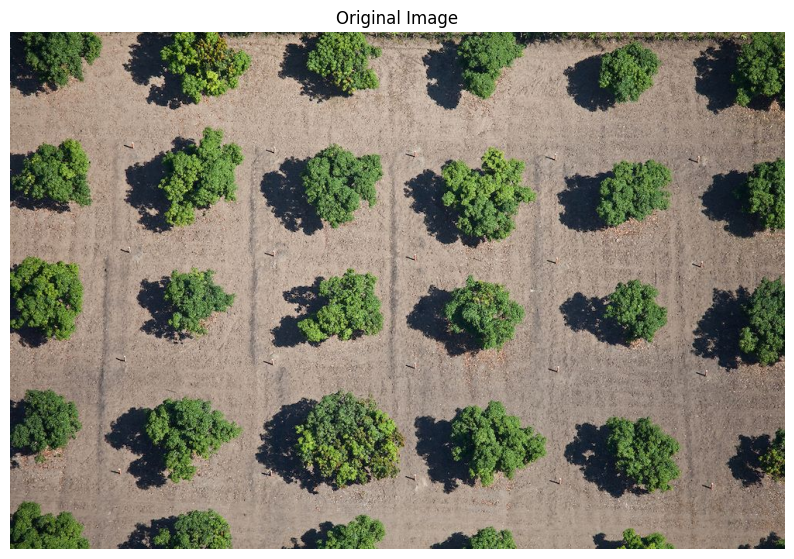

In [12]:
from plant_search.load_image import load_image, plot_image

# file_path = '../input/ESPG-4326-orthophoto.tif'
# file_path = '../input/MADRID_RGB.tif'
file_path = '../input/aerial-trees.jpg'

image = load_image(file_path)
if image is not None:
    plot_image(image, "Original Image")


#### Edge Detection

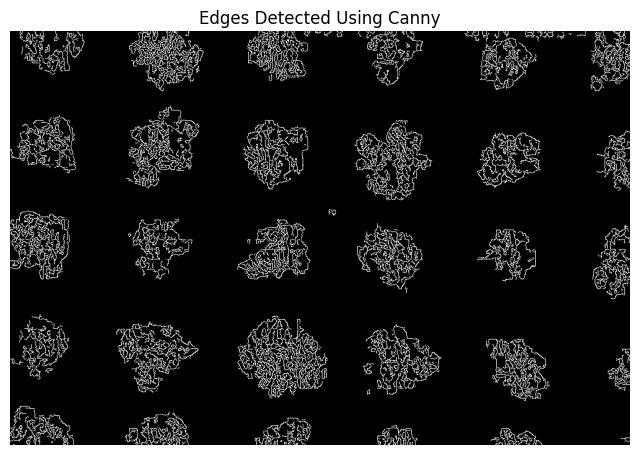

In [ ]:
from plant_search.vegetation_indices import calculate_exg, normalize_rgb

r,g,b = normalize_rgb(image)
exg = calculate_exg(r,g,b)

exg_normalized = cv2.normalize(exg, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
exg_uint8 = exg_normalized.astype(np.uint8)  # Convert to uint8 format

edges = cv2.Canny(exg_uint8, threshold1=50, threshold2=150)

# Visualize edges
plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')
plt.title("Edges Detected Using Canny")
plt.axis("off")
plt.show()


In [14]:

# Interactive function
def interactive_canny_and_mask(threshold1, threshold2, veg_threshold):
    """
    Perform Canny edge detection on a vegetation index and combine with a binary mask.
    
    Parameters:
    - threshold1: Lower threshold for Canny.
    - threshold2: Upper threshold for Canny.
    - veg_threshold: Threshold for vegetation index binary mask.
    """
    # Normalize and process ExG
    exg_normalized = cv2.normalize(exg, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    exg_uint8 = exg_normalized.astype(np.uint8)

    # Apply Canny edge detection
    edges = cv2.Canny(exg_uint8, threshold1=threshold1, threshold2=threshold2)

    # Create binary mask for vegetation index
    binary_mask = exg_normalized > veg_threshold

    # Combine edges and binary mask
    combined_mask = edges.astype(bool) | binary_mask

    # Visualize results
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Canny edges
    axes[0].imshow(edges, cmap='Greens')
    axes[0].set_title("Canny Edges")
    axes[0].axis("off")

    # Binary vegetation mask
    axes[1].imshow(binary_mask, cmap='Greens')
    axes[1].set_title(f"Vegetation Mask (Threshold = {veg_threshold})")
    axes[1].axis("off")

    # Combined mask
    axes[2].imshow(combined_mask, cmap='Greens')
    axes[2].set_title("Combined Mask (Edges + Vegetation)")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

# Create interactive sliders
interact(
    interactive_canny_and_mask,
    threshold1=IntSlider(value=50, min=0, max=255, step=1, description="Canny Thresh1"),
    threshold2=IntSlider(value=150, min=0, max=255, step=1, description="Canny Thresh2"),
    veg_threshold=FloatSlider(value=50, min=0, max=255, step=1, description="Veg Threshold")
);


interactive(children=(IntSlider(value=50, description='Canny Thresh1', max=255), IntSlider(value=150, descript…

#### Local Texture Analysis (Entropy)

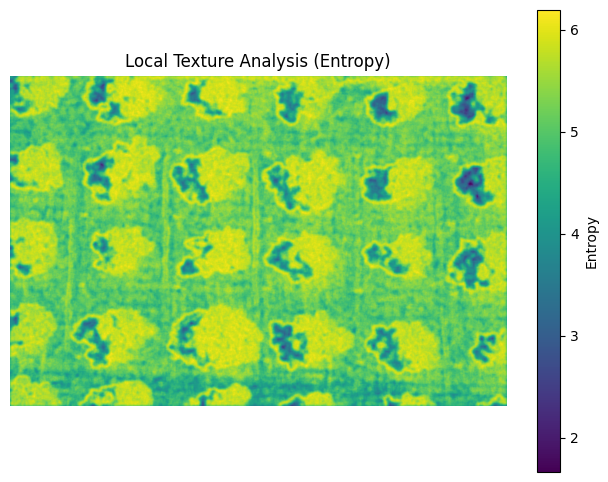

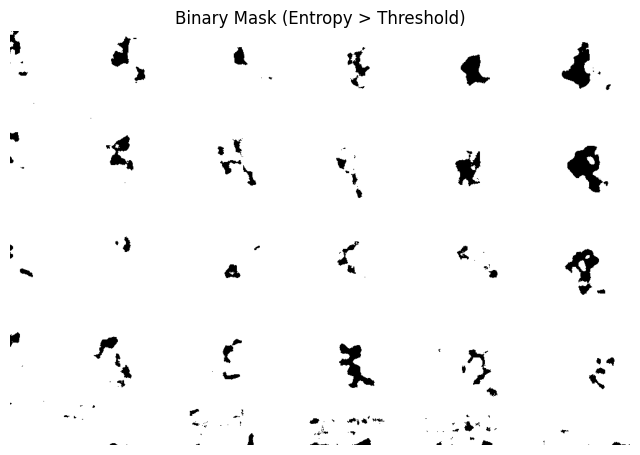

In [15]:
from skimage.filters.rank import entropy
from skimage.morphology import disk

# Calculate entropy using a disk-shaped neighborhood
entropy_image = entropy(gray_image, disk(5))  # Adjust disk size for larger/smaller neighborhoods

# Visualize entropy
plt.figure(figsize=(8, 6))
plt.imshow(entropy_image, cmap='viridis')
plt.colorbar(label="Entropy")
plt.title("Local Texture Analysis (Entropy)")
plt.axis("off")
plt.show()

# Threshold the entropy to create a binary mask
entropy_threshold = 4.0  # Adjust threshold based on the image
binary_mask_entropy = entropy_image > entropy_threshold

# Visualize the binary mask
plt.figure(figsize=(8, 6))
plt.imshow(binary_mask_entropy, cmap='gray')
plt.title("Binary Mask (Entropy > Threshold)")
plt.axis("off")
plt.show()
